In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Studentsperformance.csv')
df.head(5)



,Student ID,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,female,group A,bachelor's degree,standard,none,73,92,63
1,2,male,group B,some college,free/reduced,completed,68,99,95
2,3,female,group C,master's degree,standard,none,97,95,90
3,4,male,group D,associate's degree,free/reduced,completed,71,49,52
4,5,female,group E,high school,standard,none,68,92,75


In [9]:
print(df.describe())


       Student ID  math score  reading score  writing score
count    50.00000   50.000000      50.000000      50.000000
mean     25.50000   71.780000      74.280000      69.700000
std      14.57738   16.472971      17.342928      18.378392
min       1.00000   40.000000      43.000000      40.000000
25%      13.25000   58.500000      59.500000      54.250000
50%      25.50000   71.000000      72.500000      71.000000
75%      37.75000   86.000000      91.000000      85.750000
max      50.00000   99.000000      99.000000     100.000000


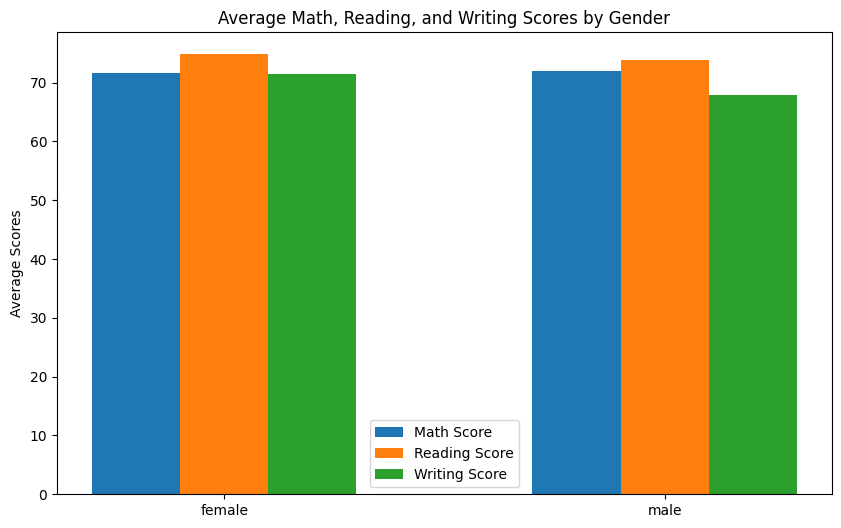

In [10]:
# Calculate mean scores for each gender
mean_scores = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()

# Plotting
labels = mean_scores.index  # Gender categories
math_scores = mean_scores['math score']
reading_scores = mean_scores['reading score']
writing_scores = mean_scores['writing score']

# Define position of the bars on the x-axis
x = np.arange(len(labels))  # the label locations
width = 0.2  # width of the bars

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, math_scores, width, label='Math Score')
rects2 = ax.bar(x, reading_scores, width, label='Reading Score')
rects3 = ax.bar(x + width, writing_scores, width, label='Writing Score')

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('Average Scores')
ax.set_title('Average Math, Reading, and Writing Scores by Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.show()

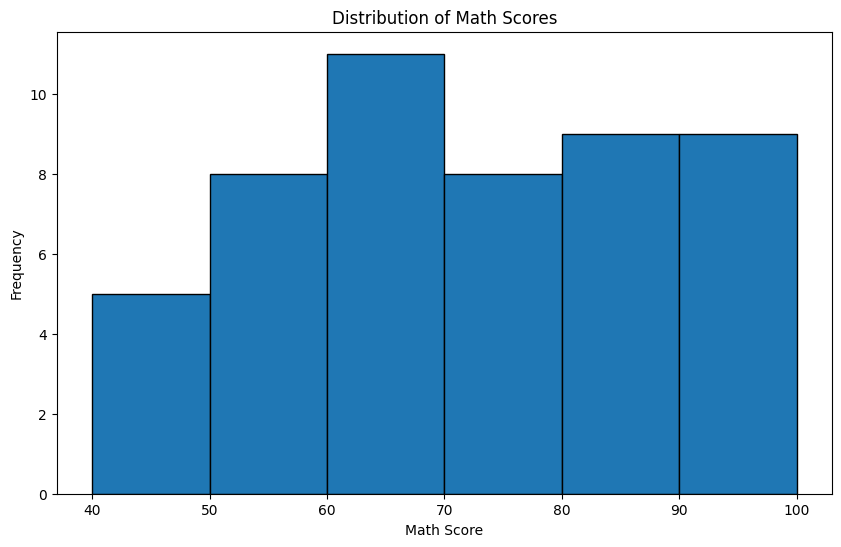

In [5]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['math score'], bins=[40, 50, 60, 70, 80, 90, 100], edgecolor='black')

# Customize the plot
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')

# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

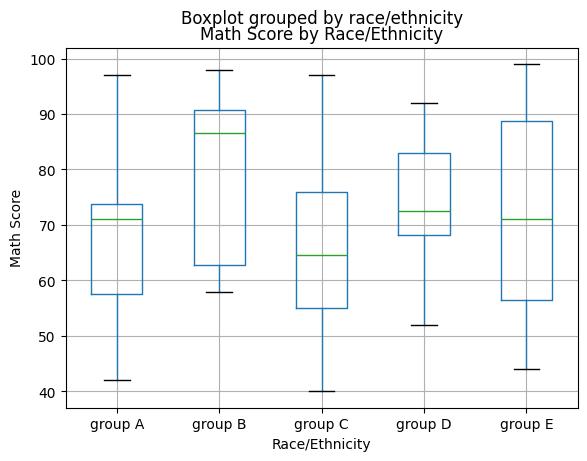

In [7]:

# Create the boxplot
plt.figure(figsize=(10, 6))
df.boxplot(column='math score', by='race/ethnicity')

# Customize the plot
plt.title('Math Score by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Math Score')

# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

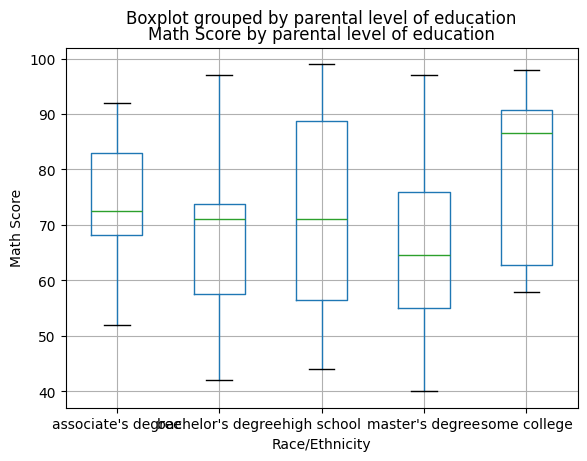

In [22]:

# Create the boxplot
plt.figure(figsize=(10, 6))
df.boxplot(column='math score', by='parental level of education')

# Customize the plot
plt.title('Math Score by parental level of education')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Math Score')

# Show the plot
plt.show()

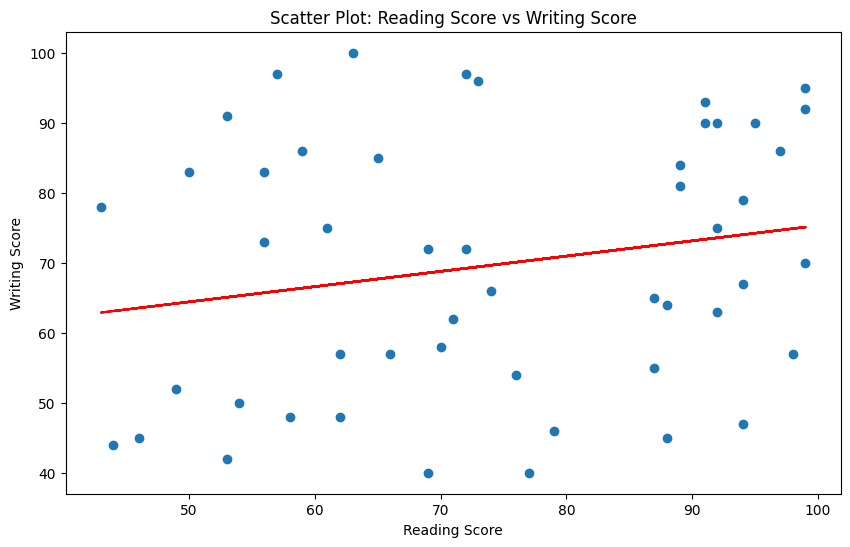

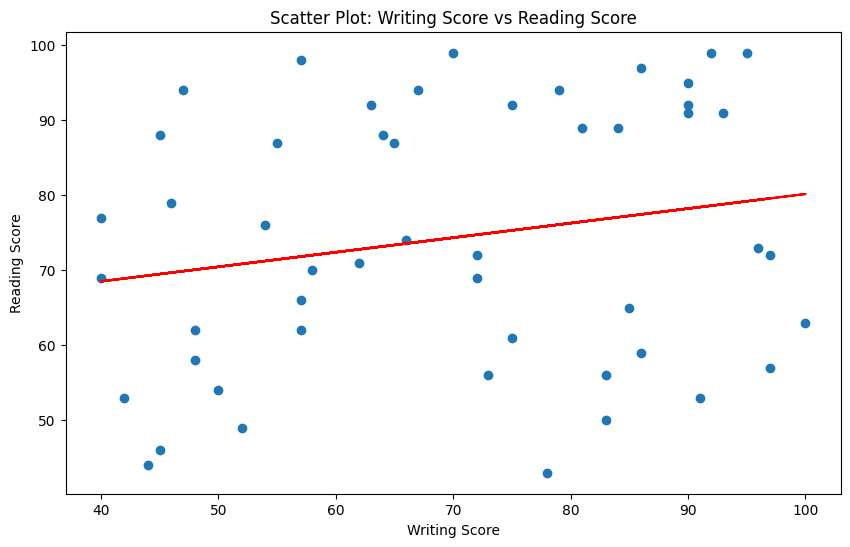

In [8]:
import matplotlib.pyplot as plt

# Scatter plot with reading score as x-axis
plt.figure(figsize=(10, 6))
plt.scatter(df['reading score'], df['writing score'])
plt.title('Scatter Plot: Reading Score vs Writing Score')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')

# Linear regression line
m, b = np.polyfit(df['reading score'], df['writing score'], 1)
plt.plot(df['reading score'], m * df['reading score'] + b, color='red')

plt.show()

# Scatter plot with writing score as x-axis
plt.figure(figsize=(10, 6))
plt.scatter(df['writing score'], df['reading score'])
plt.title('Scatter Plot: Writing Score vs Reading Score')
plt.xlabel('Writing Score')
plt.ylabel('Reading Score')

# Linear regression line
m, b = np.polyfit(df['writing score'], df['reading score'], 1)
plt.plot(df['writing score'], m * df['writing score'] + b, color='red')

plt.show()

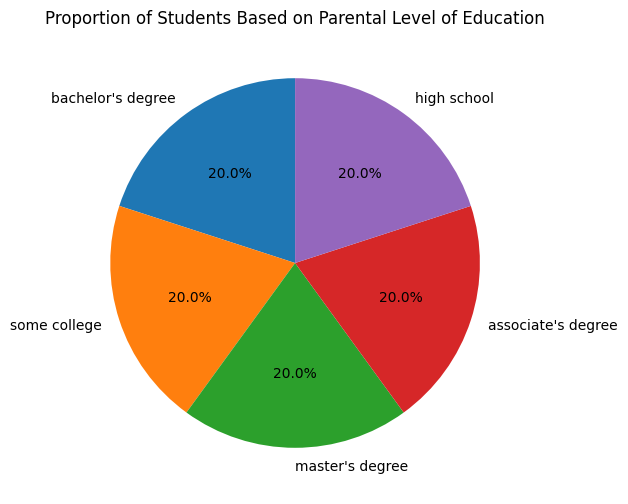

In [13]:
# Count the number of students for each parental level of education
parental_education_counts = df['parental level of education'].value_counts()

# Plotting
labels = parental_education_counts.index  # Parental education categories
sizes = parental_education_counts.values  # Number of students for each category

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Customize the plot
plt.title('Proportion of Students Based on Parental Level of Education')

# Show the plot
plt.show()


Examining the data for this school I have found that the school is shockingly diverse, with an even 5 way split between ethnic groups. 
 I have found that gender equity at this school appears pretty good, with average male/female test scores being pretty comparable.
 The math test is quite hard, the vast majority scores fall within the 60-70 range.
Reading and writing scores are not nearly as correlated as I would have expected, even flpping around the independent variable didn't change that.
Something very strange is that all of our ethnic groups have completely homogenous levels of educational attainment from their parents, meaning that our boxplot of math scores is also an examination of the effect of parent education levels. Through this lens, there is the surprising result that having
"some college" produces a higher median math score than either bachelors or masters degrees, the most surprising aspect of this is that apparently,
 your parents having a master's degree makes you bad at math. There are also worrying socioeconomic implications about the country where there school is located if race/ethnicity is such a strong predictor of parental education level.